Faire un preambule ce qui va faire le plan de soutenance

- analyse du fond
- de la forme
- des valeurs atypiques

- noter le probleme rencontrer comment tu l'a corrigé

- shape
- info
- describe
- remplissage des colonne (traitement des valeur null),
- valeur impossible
- aberante 

# Ce projet fonctionne avec les versions des package suivants:
- pandas 2.2.2
- matplotlib 3.9.0
- seaborn 0.13.2

# Démarche

Nous avons un jeu de données fournit par la ville de Paris.

## Connaitre notre jeu de données.
### On identifie:
1. les dimensions du dataset
2. le type de données
3. Les valeurs principales valeurs (Max, min, impossible, abérrantes)

### Approche:
Notre dataset étant un dataset des arbres de Paris, nous nous concentrons pour le nettoage de données (valeurs impossible et abérrantes) sur les dimensions des arbres(hauteur, circonférences).

#### On remarque:
- 200 137 lignes et 18 colonnes (18 variables potenielles à étudier)
- On remarque aussi des valeurs Max pour la hauteur de 881818m soit 881.818 kms et circonférence de 250255 cm soit 2502.55m. ce sont des valeurs impossible
- Idem pour les valeurs min. Un arbre ne peu pas exister et avoir une hauteur ou une circonférence de zero. Donc se sont des valeurs impossible.
- 
### Valeur nulles
- On comptabilise ensuite le nombre de valeurs null pour chaque variables
- On réalise une représentation graphique pour visualiser quelles variables ont le plus de valeur nulles ( ici sous forme de heatmap)
    - On peut supprimer les colonnes:
    - 'id', 'numero', 'complement_addresse', 'id_emplacement',
    - 'libelle_francais','genre','espece','variete'
qui sont null quasiement à 100% donc inutile pour nous ou non pertinent pour notre analyse.

### Nettoyage des données

une fois les colonnes non utilisé supprimées, on traite les valeurs impossible.<br/>
<br/>
#### Valeurs impossibles<br/>
- La hauteur :<br/>
Detailer les pourquoi des valeurs imossible
**En 2021 un des arbres le plus haut à Paris faisait 30m**<br/>
https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne<br/>
**on peut retrouver une data d'un arbre de 45m en 2006**<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteur en m.<br/>
On prendra ne hauteur max de 50 m dans notre cas.<br/>
<br/>
- La circonférence :<br/>
**En 2006 la circonférence max des arbres à Paris était de 740 cm**<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm<br/>
https://www.unjourdeplusaparis.caom/paris-vert/arbres-remarquables-paris<br/>

Les arbres au dessus seront donc considéré comme des valeurs impossibles.

- il s'agit là d'une règle de validation Simples: On définit une valeur maximum et minimum à ne pas dépasser.

##### Autres méthode de détection des valeurs impossibles<br/>

- Types de Données:
Vérifier que les données respectent le type attendu (entier, flottant, chaîne de caractères, etc.).  

- Contraintes Domain-Specific:
  Une autre approche serait de valider la cohérence de croissance des arbres en fonction e leur hauteur / circonférence (Pour cela il nous faudrait le coefficient multiplicateur par essence d'arbre)
#### Valeurs abérrantes<br/>

On utilise la méthode des écarts interquatile (IQR)

Pour identifer nos outliers, on affiche un boxplot de la hauteur et la circonférence avant et après.

### Analyse univariées

Maintenant que notre dataset est nettoyé de toute les valeurs impossible ainsi que des outliers, on peut travailler sur une analyse univarié. Cela se traduit ar le calcul des plusieurs indicateurs

On commence par définir les indicateurs de tendance centrale:
- La Moyenne de la hauteur et de la circonférence
- Mediane pour définir le point de division de notre dataset pour la hauteur et la cironférence
- Mode qui nous donne les valeurs les plus représentées our chaque variables

- Variance
- ecart-type
- intervalle intercartile IQR

### Analyse bivariées

On réalise ensuite une matrice de corrélation pour comprendre le lien entre nos variables
La première matrice .corr() permet de valider la correlaion entre les variables quantitative (numerique).

La matrice de correlation montre un lien entre hauteur et circonférence

Pour connaitre la relation entre les variables qualitative, on utilise une matrice des associations.

La matrice des associations montre les relations entre les différentes variables avec des valeurs allant de 0 à 1. Les valeurs élevées indiquent des associations fortes, tandis que les valeurs faibles ou NaN indiquent des associations faibles ou inexistantes.

1. Variables Quantitatives :

- circonference_cm et hauteur_m ont une forte corrélation (0.813067).
- Les autres associations entre variables quantitatives et qualitatives montrent des valeurs modérées ou élevées, ce qui mérite une attention particulière.

2. Variables Qualitatives :

- stade_developpement, domanialite, et remarquable montrent des associations élevées entre elles (valeurs proches de 1).

3. Variables Géographiques :

- arrondissement montre des associations modérées avec stade_developpement (0.184360) et domanialite (0.316322).

### Cible d'Étude

Pour améliorer les tournées des agents d'entretien, nous devons cibler les variables qui influencent significativement la tâche d'entretien.

cibles potentielles:
- Variables Géographiques : arrondissement
- Caractéristiques des Arbres : circonference_cm et hauteur_m
- Stade de Développement : stade_developpement
- Domanialité : domanialite

### Proposition d'Améliorations

1. Analyse des Variables Géographiques :

- Arrondissement : La répartition des arbres par arrondissement peut indiquer les zones nécessitant plus d'attention.

2. Analyse des Caractéristiques des Arbres :

- Circonférence et Hauteur : Les arbres de grande taille peuvent nécessiter plus de temps pour l'entretien.

3. Analyse des Stades de Développement et Domanialité :

- Comprendre la distribution des stades de développement et des domanialités par arrondissement peut aider à prioriser les tournées.

## Ojectifs:
- Réaliser une analyse de données afin d'optimiser les tournées des personne d'entretien

## Installation Package

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
#import prince

import folium
import geopandas as gpd

## Chargement du DataSet à partir du fichier CSV

In [8]:
data= pd.read_csv("datas/p2-arbres-fr.csv", sep=";") #chargement du fichier CSV dans la variables data

## Analyse du jeu de données

### Identifier les types de données

**1-connaitre les dimensions de son dataset**

In [12]:
# dimension du dataset
dimension = data.shape
print(f"Le nombre de ligne du dataFrame {dimension[0]}")
print(f"Le nombre de colonne du dataFrame {dimension[1]}")

Le nombre de ligne du dataFrame 200137
Le nombre de colonne du dataFrame 18


**2- connnaitre la composition de son dataset**

In [14]:
# on identifie les colonnes et le types de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

#### Variables quantitative

**3- identifier les principales valeurs de son dataset**

In [17]:
# description des variables quantitative
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


#### Variables qualitative

In [19]:
# description des variables qualitative
data.describe(include="object")

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
count,200137,200136,200137,30902,200137,200137,198640,200121,198385,36777,132932
unique,1,9,25,3795,6921,69040,192,175,539,436,4
top,Arbre,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',A
freq,200137,104949,17151,557,2995,1324,42508,42591,36409,4538,64438


**4- compte les nombre de valeurs null pour chaque variables**

In [21]:
null_counts = data.isnull()
null_percentage = (null_counts.sum()/len(data))*100
for column, percentage in null_percentage.items():
    print(f'{column}: {percentage:.2f}%')

id: 0.00%
type_emplacement: 0.00%
domanialite: 0.00%
arrondissement: 0.00%
complement_addresse: 84.56%
numero: 100.00%
lieu: 0.00%
id_emplacement: 0.00%
libelle_francais: 0.75%
genre: 0.01%
espece: 0.88%
variete: 81.62%
circonference_cm: 0.00%
hauteur_m: 0.00%
stade_developpement: 33.58%
remarquable: 31.53%
geo_point_2d_a: 0.00%
geo_point_2d_b: 0.00%


**5-représentation des valeurs nulles en heatmap**

Text(95.5815972222222, 0.5, 'Colonnes')

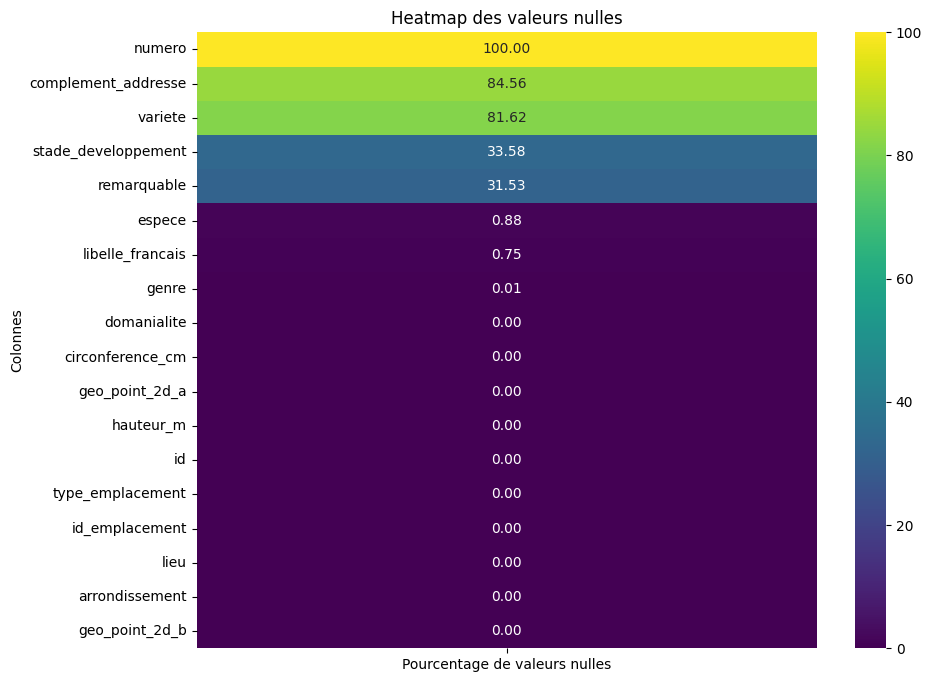

In [23]:
null_percentage=null_percentage.sort_values(ascending=False)
null_percentage_df = pd.DataFrame(null_percentage, columns=['Pourcentage de valeurs nulles'])
plt.figure(figsize=(10,8))
sns.heatmap(null_percentage_df,cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap des valeurs nulles')
#plt.xlabel('Pourcentage valeurs nulles')
plt.ylabel('Colonnes')

### Nettoyage des données

In [25]:
# On supprime toute les colonnes que l'on ne souhaite pas utiliser

In [26]:
data.drop(['numero','complement_addresse','id_emplacement','lieu','genre','espece','variete'], axis=1,inplace=True)
data.head()

,id,type_emplacement,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,Marronnier,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,If,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,If,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,Erable,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,Arbre à miel,38,0,NaN,NaN,48.890435,2.315289


In [27]:
zero_counts = (data==0).sum()
zero_percentage = (zero_counts / len(data))*100
zero_percentage=zero_percentage.sort_values(ascending=False)
zero_percentage_df=pd.DataFrame(zero_percentage, columns=['Pourcentage de valeurs égales à zéro'])

Text(95.5815972222222, 0.5, 'Colonnes')

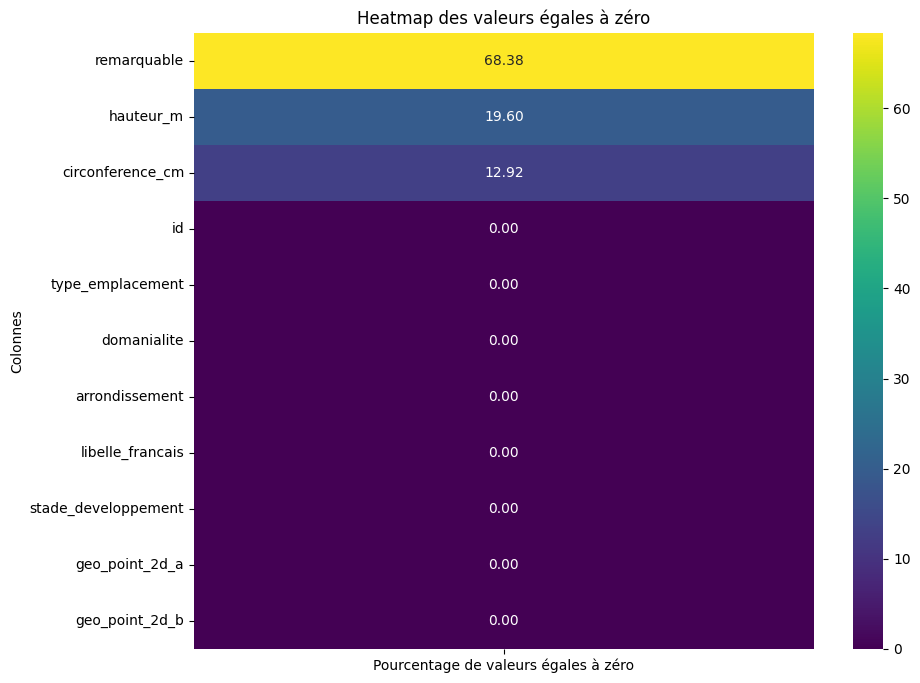

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(zero_percentage_df, cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap des valeurs égales à zéro')
plt.ylabel('Colonnes')

#### Les valeurs impossibles

In [30]:
# On regarde le nobre d'individu égale à nan par colonne
data.isna().sum()

id                         0
type_emplacement           0
domanialite                1
arrondissement             0
libelle_francais        1497
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
remarquable            63098
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

In [31]:
# On transforme en %
nan_percentage = (data.isna().sum()/len(data))*100
column_with_nan_percentage = nan_percentage[nan_percentage>0]
column_with_nan_percentage.round(2)

domanialite             0.00
libelle_francais        0.75
stade_developpement    33.58
remarquable            31.53
dtype: float64

In [32]:
# On supprime les valeur nan
data = data.dropna(subset=['domanialite','libelle_francais','stade_developpement','remarquable'])

In [33]:
max_height=50

num_tall_trees = (data['hauteur_m']>max_height).sum()
num_tall_trees_null = (data['hauteur_m']==0).sum()
print(f"Il y a {num_tall_trees} arbres ayant une hauteur de {max_height} m soit {((num_tall_trees/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {num_tall_trees_null} arbres ayant une circonference null soit {((num_tall_trees_null/dimension[0])*100).round(2)} % du total des arbres")

Il y a 437 arbres ayant une hauteur de 50 m soit 0.22 % du total des arbres
et 2114 arbres ayant une circonference null soit 1.06 % du total des arbres


In [34]:
# on retire donc dans un premier temps la hauteur abérante en considérant un hauteur max de 50 m
data = data[data['hauteur_m'] <= max_height]
data = data[data['hauteur_m'] != 0]
data.shape

(117143, 11)

In [35]:
max_circonference = 740
sorted_circonference = (data['circonference_cm']>max_circonference).sum()
numb_circonference_null = (data['circonference_cm']==0).sum()

print(f"Il y a {sorted_circonference} arbres ayant une circonference de plus de {max_circonference/100} m soit {((sorted_circonference/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {numb_circonference_null} arbres ayant une circonference null soit {((numb_circonference_null/dimension[0])*100).round(2)} % du total des arbres")

Il y a 76 arbres ayant une circonference de plus de 7.4 m soit 0.04 % du total des arbres
et 17 arbres ayant une circonference null soit 0.01 % du total des arbres


In [36]:
# on retire la circonférence supèrieur à max_circonférence.
data = data[data['circonference_cm'] <= max_circonference]
data = data[data['circonference_cm'] != 0]
data.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.170500e+05,117050.000000,117050.000000,117050.000000,117050.000000,117050.000000
mean,4.098471e+05,96.924297,10.837625,0.001529,48.854860,2.346140
std,5.413685e+05,58.259718,5.162316,0.039076,0.025585,0.049406
min,9.988200e+04,1.000000,1.000000,0.000000,48.756206,2.211263
25%,2.049632e+05,55.000000,7.000000,0.000000,48.836635,2.308438
50%,2.450855e+05,85.000000,10.000000,0.000000,48.854089,2.347542
75%,2.807898e+05,130.000000,15.000000,0.000000,48.872769,2.381562
max,2.023308e+06,710.000000,50.000000,1.000000,48.911050,2.469759


#### Les valeurs abérantes

Text(0.5, 1.0, 'Boite à moustache des hauteur en m')

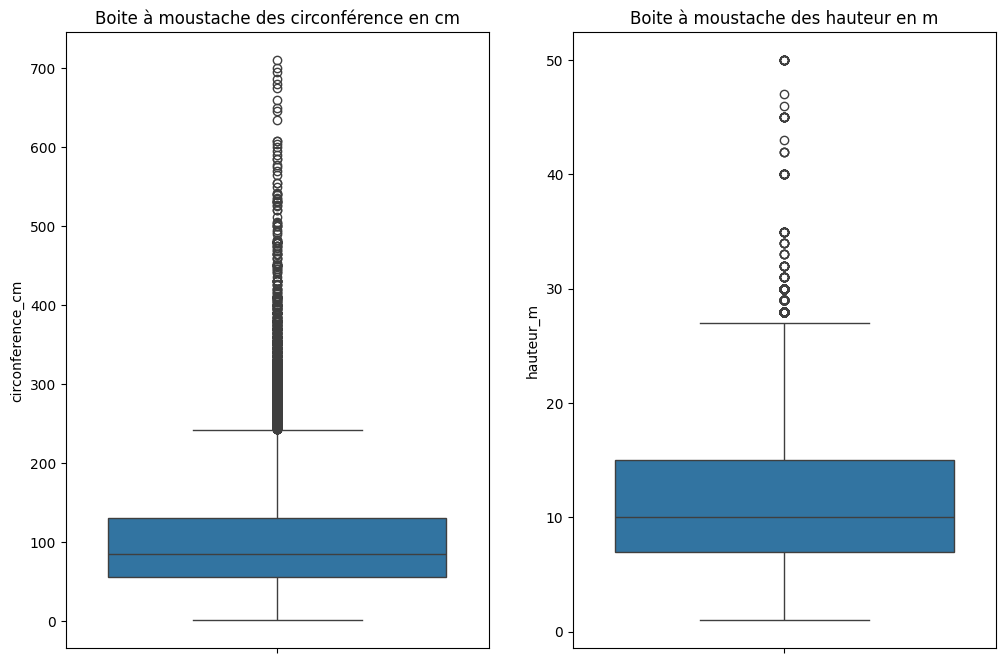

In [38]:
fig, axs= plt.subplots(1,2, figsize=(12,8))

sns.boxplot(data['circonference_cm'], ax=axs[0])
axs[0].set_title('Boite à moustache des circonférence en cm')

sns.boxplot(data['hauteur_m'], ax=axs[1])
axs[1].set_title('Boite à moustache des hauteur en m')

In [39]:
def detect_outliers_(data, column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_limit = max(0,Q1-1.5 * IQR)
    upper_limit = Q3 + 1.5 *IQR
    outliers = (data[column]<lower_limit) | (data[column]>upper_limit)
    return outliers, lower_limit, upper_limit

In [40]:
outliers_hauteur, lower_hauteur, upper_hauteur = detect_outliers_(data,'hauteur_m')
outliers_circonference, lower_circonference, upper_circonference = detect_outliers_(data,'circonference_cm')
print(f'Limites pour hauteur_m: inférieure = {lower_hauteur}, supérieure = {upper_hauteur}')
print(f'Limites pour circonference_cm: inférieure = {lower_circonference}, supérieure = {upper_circonference}')

Limites pour hauteur_m: inférieure = 0, supérieure = 27.0
Limites pour circonference_cm: inférieure = 0, supérieure = 242.5


In [41]:
data=data[(data['hauteur_m']>=lower_hauteur) & (data['hauteur_m']<=upper_hauteur) & (data['circonference_cm']>=lower_circonference) & (data['circonference_cm']<upper_circonference) ]
data.shape

(114406, 11)

Text(0.5, 1.0, 'Boite à moustache des hauteur en m')

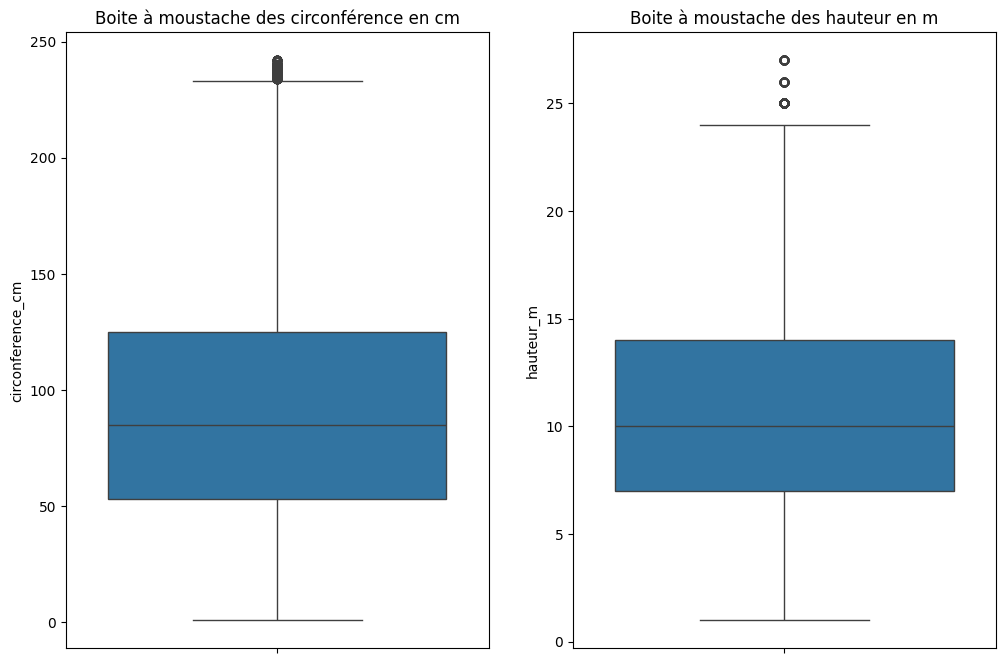

In [42]:
fig, axs= plt.subplots(1,2, figsize=(12,8))

sns.boxplot(data['circonference_cm'], ax=axs[0])
axs[0].set_title('Boite à moustache des circonférence en cm')

sns.boxplot(data['hauteur_m'], ax=axs[1])
axs[1].set_title('Boite à moustache des hauteur en m')

## Analyse univariee

Graph de distribution
Remarquale repartition d arbre un barplot

Par arrondissement (piechart)

histogramme
circonference histogram (par circonférence)
haueteur (par hauteur)

piechart
par arrondissement

libelle francais.
stade de developpement

### Distribution des arbres remarquables

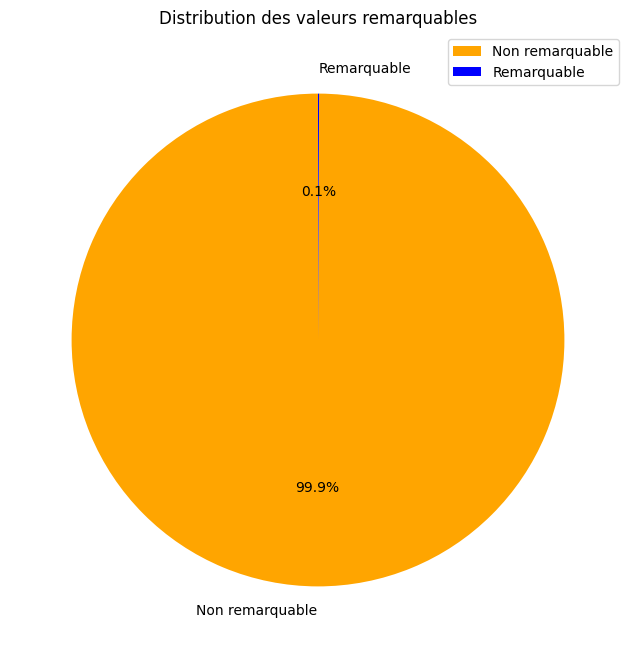

In [169]:
remarquable_counts = data['remarquable'].value_counts()

# Étiquettes pour le graphique en camembert
labels = ['Non remarquable', 'Remarquable']

plt.figure(figsize=(8, 8))
plt.pie(remarquable_counts, labels = labels, autopct='%1.1f%%', startangle = 90, colors =['orange','blue'])
plt.title("Distribution des valeurs remarquables")
plt.legend(loc="best")

### Distribution des arbres par arrondissements

Text(0.5, 1.0, 'Distribution des arbres par arrondissement')

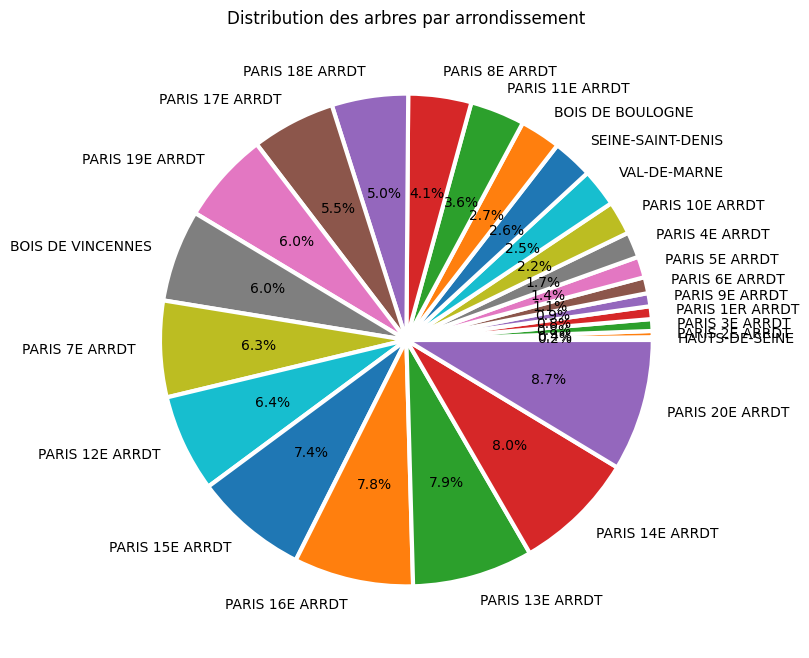

In [282]:
# Distribution des arbres par arrondissement
arrondissement_counts = data['arrondissement'].value_counts().sort_values()
arrondissement_order = arrondissement_counts.index


plt.figure(figsize=(8, 8))
plt.pie(arrondissement_counts, labels=arrondissement_order, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%');
plt.title("Distribution des arbres par arrondissement")
#plt.legend(arrondissement_order,loc="lower center")

# Visualisation
#plt.figure(figsize=(10, 6))
#sns.countplot(data=data, x='arrondissement', palette='viridis', hue='arrondissement', order =arrondissement_order)
#plt.title("Nombre d'Arbres par Arrondissement")
#plt.xlabel("Arrondissement")
#plt.ylabel("Nombre d'Arbres")
#plt.xticks(rotation=90)
#plt.tight_layout()

### Distribution des arbres par hauteurs

Text(0, 0.5, "Nombre d'arbres")

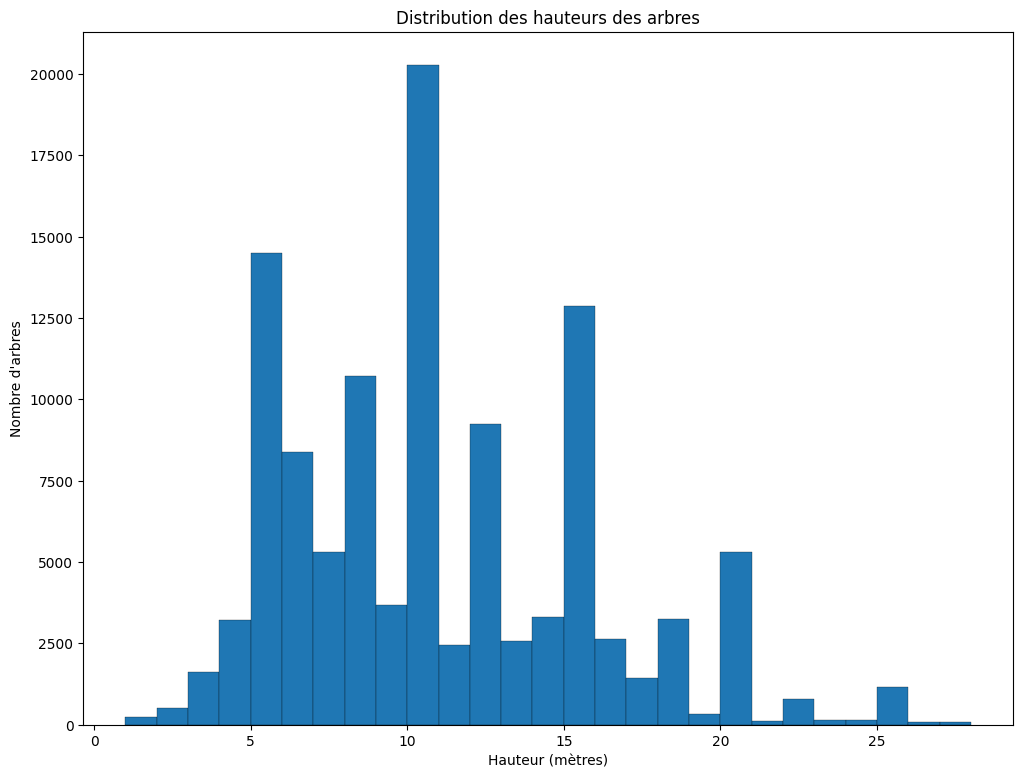

In [301]:
fig, ax = plt.subplots(figsize =(12,9))
ax.hist(data['hauteur_m'], bins=range(int(data['hauteur_m'].min()), int(data['hauteur_m'].max()) + 2), edgecolor="black",linewidth=.2)

# Ajouter des titres et des labels
ax.set_title("Distribution des hauteurs des arbres")
ax.set_xlabel("Hauteur (mètres)")
ax.set_ylabel("Nombre d'arbres")

Text(0, 0.5, "Nombre d'arbres")

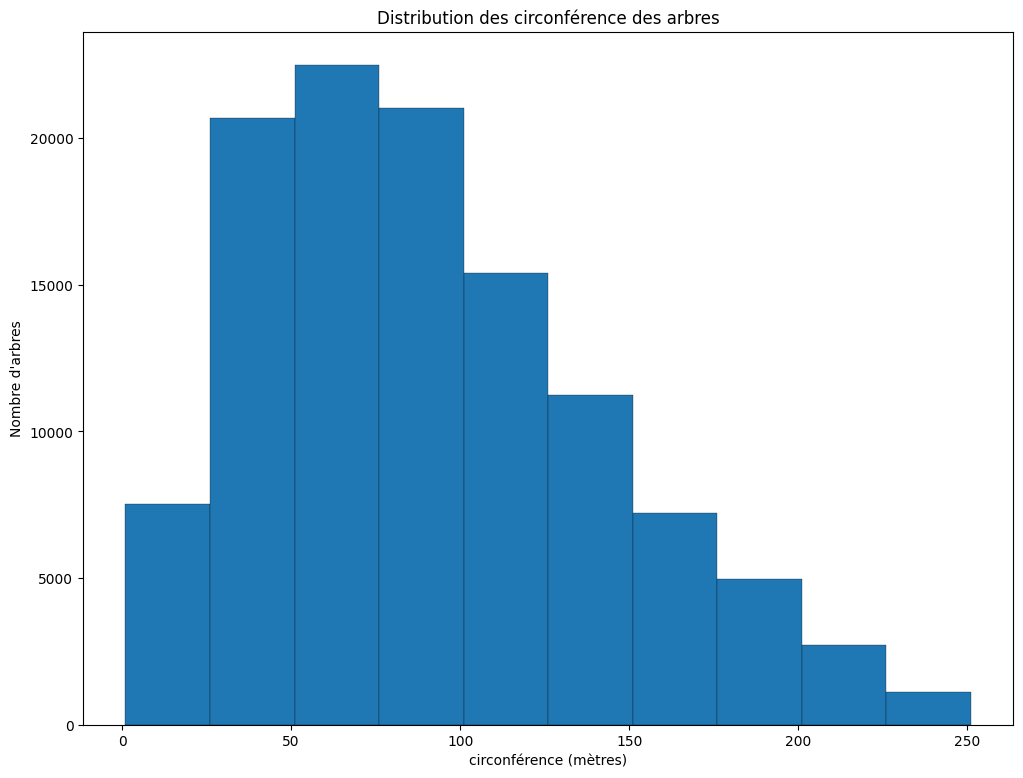

In [303]:
bins = range(int(data['circonference_cm'].min()), int(data['circonference_cm'].max()) + 25, 25)

fig, ax = plt.subplots(figsize =(12,9))
ax.hist(data['circonference_cm'], bins=bins, edgecolor="black",linewidth=.2)

# Ajouter des titres et des labels
ax.set_title("Distribution des circonférence des arbres")
ax.set_xlabel("circonférence (mètres)")
ax.set_ylabel("Nombre d'arbres")

## Distribution des libelles francais

### Histogramme

In [323]:
libelle_francais_counts=data['libelle_francais'].value_counts()

Text(0, 0.5, "Nombre d'arbres")

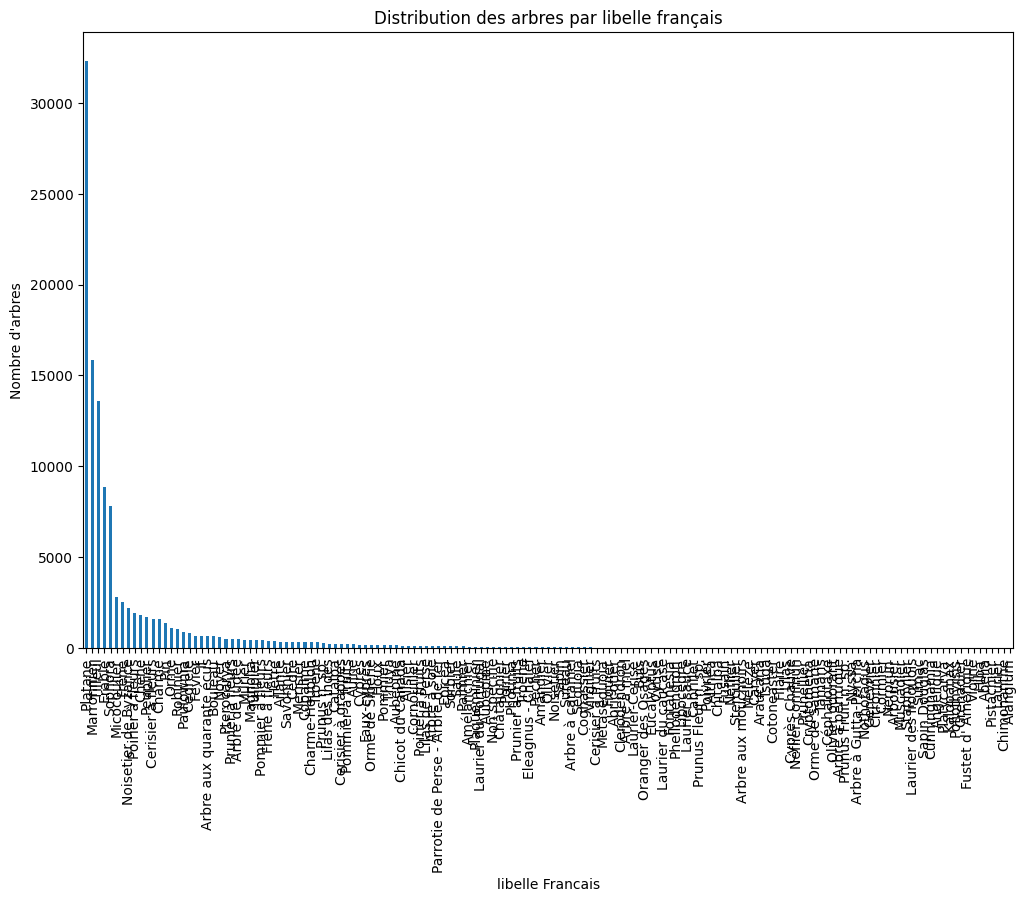

In [325]:
plt.figure(figsize=(12,8))
libelle_francais_counts.plot(kind='bar')
plt.title('Distribution des arbres par libelle français')
plt.xlabel('libelle Francais')
plt.ylabel('Nombre d\'arbres')

### PieChart

Text(0, 0.5, '')

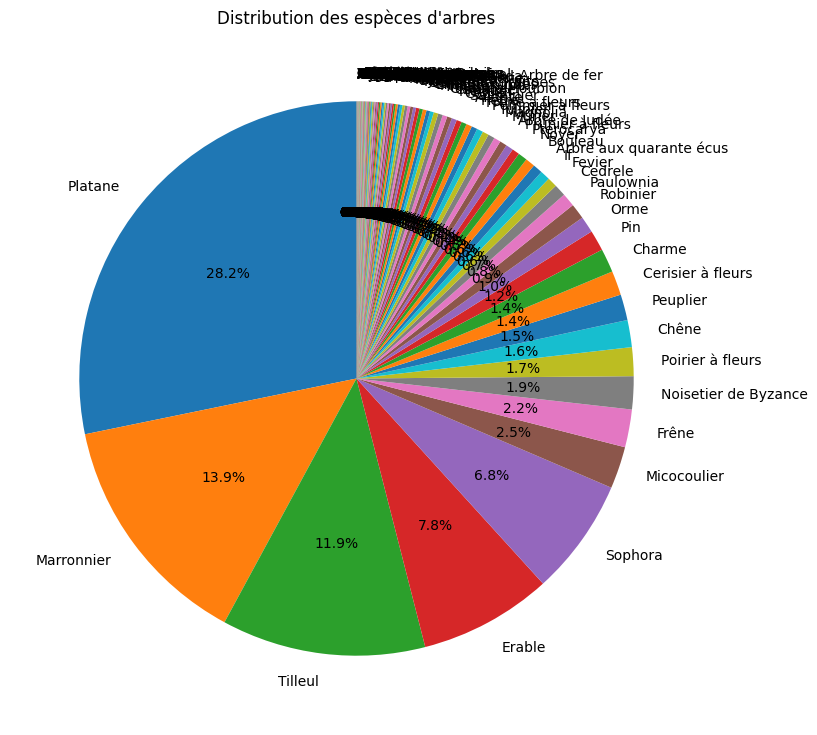

In [356]:
plt.figure(figsize=(12,9))
libelle_francais_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution des espèces d\'arbres')
plt.ylabel('')

## Distribution satde de développement

### piechart

In [352]:
stade_developpement_counts=data['stade_developpement'].value_counts()

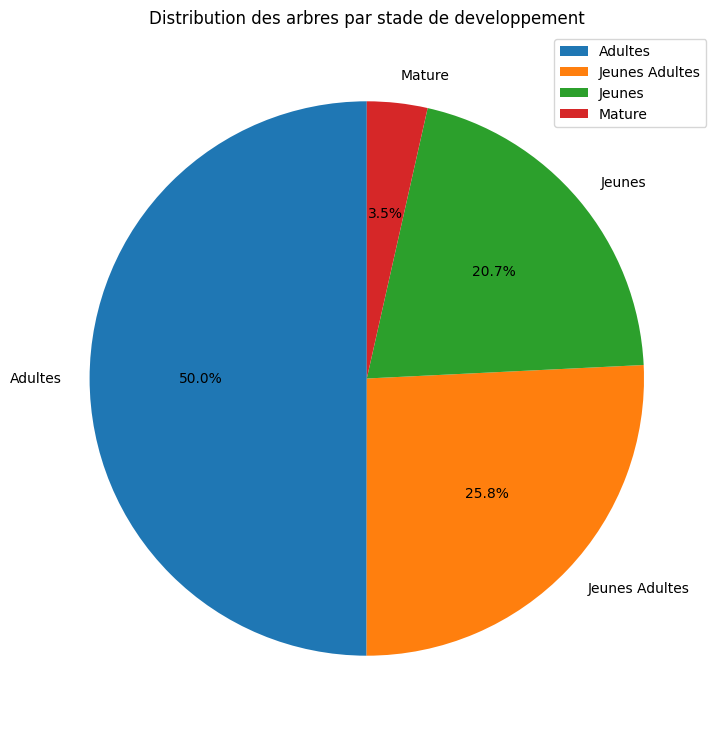

In [364]:
labels =['Jeunes', 'Jeunes Adultes', 'Adultes','Mature']
label_mapping = {
    'J': 'Jeunes',
    'JA': 'Jeunes Adultes',
    'A': 'Adultes',
    'M': 'Mature'
}

pie_labels = [label_mapping[stage] for stage in stade_developpement_counts.index]
plt.figure(figsize=(12,9))
stade_developpement_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=pie_labels)
plt.title('Distribution des arbres par stade de developpement')
plt.ylabel('')
plt.legend()

In [49]:
# moyenne de la hauteur
h_mean = data['hauteur_m'].mean()
c_mean = data['circonference_cm'].mean()
print(f'Les arbres on une hauteur moyenne de {h_mean.round(2)} m et une circonférence moyenne de {c_mean.round(2)} cm')
print(f'On en déduit que notre arbre moyen fait {h_mean.round(2)} m de hauteur et {c_mean.round(2)} cm de circonférence')

Les arbres on une hauteur moyenne de 10.57 m et une circonférence moyenne de 92.69 cm
On en déduit que notre arbre moyen fait 10.57 m de hauteur et 92.69 cm de circonférence


In [50]:
h_median = data['hauteur_m'].median()
c_median = data['circonference_cm'].median()
print(f'On en déduit que les arbres plus petit que {h_median} m sont aussi nombreux que les arbres plus grand que {h_median} m')
print(f'On en déduit qu\'il y a autant d\'arbres plus fin que {c_median} cm que d\'arbres plus gros que {c_median} cm')

On en déduit que les arbres plus petit que 10.0 m sont aussi nombreux que les arbres plus grand que 10.0 m
On en déduit qu'il y a autant d'arbres plus fin que 85.0 cm que d'arbres plus gros que 85.0 cm


In [51]:
mode = data.mode().iloc[0]
mode

id                               99882
type_emplacement                 Arbre
domanialite                 Alignement
arrondissement         PARIS 20E ARRDT
libelle_francais               Platane
circonference_cm                  70.0
hauteur_m                         10.0
stade_developpement                  A
remarquable                        0.0
geo_point_2d_a               48.837168
geo_point_2d_b                2.298566
Name: 0, dtype: object

In [52]:
var = data.var(numeric_only=True)
var

id                  2.920663e+11
circonference_cm    2.570096e+03
hauteur_m           2.320718e+01
remarquable         7.162382e-04
geo_point_2d_a      6.446781e-04
geo_point_2d_b      2.443557e-03
dtype: float64

In [53]:
quantiles = data.select_dtypes(include=['number'])
quantiles = quantiles.quantile([0.25,0.5,0.75])
quantiles

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
0.25,206939.25,53.0,7.0,0.0,48.836869,2.308222
0.50,245523.50,85.0,10.0,0.0,48.854185,2.347278
0.75,280972.75,125.0,14.0,0.0,48.872838,2.381573


# Analyse bivariée

dotmap 

expliquer correlation +, - ou pas de correlation

In [56]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

#data_encoded=pd.get_dummies(data, drop_first=True)
#correlation_matrix = data_encoded.corr()

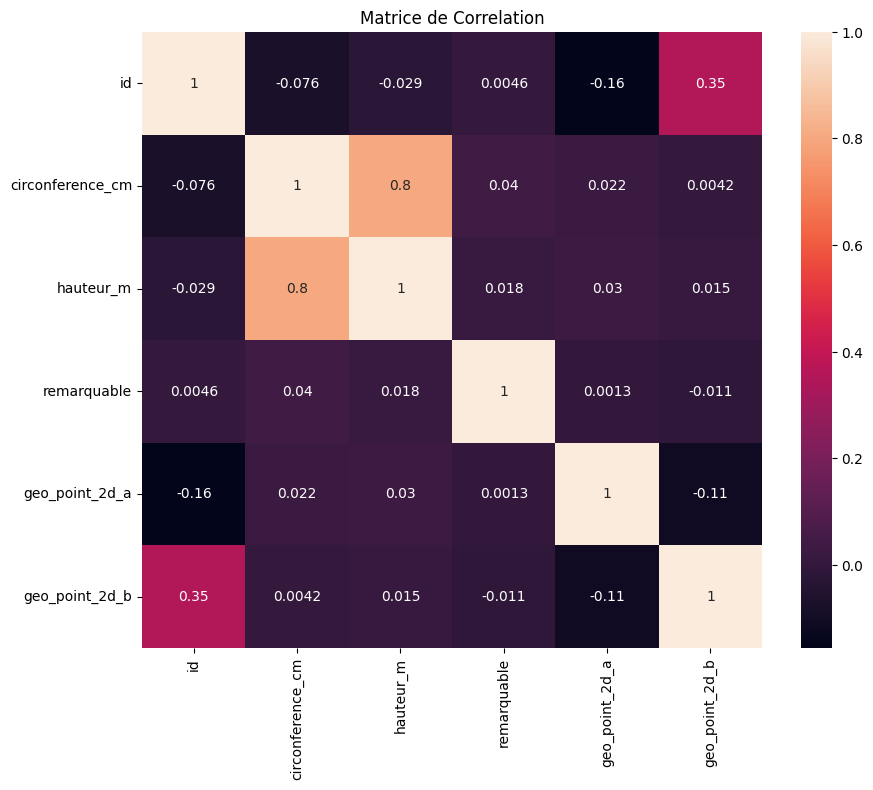

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrice de Correlation")
plt.show()

In [58]:
unique_value = data['remarquable'].isna().sum()

Matrice des associations (Cramér's V et ANOVA) :
                     stade_developpement  domanialite  remarquable  \
stade_developpement             1.000000     0.078720     1.000000   
domanialite                     0.078720     1.000000     1.000000   
remarquable                     1.000000     1.000000     1.000000   
arrondissement                  0.185298     0.319534     1.000000   
circonference_cm                1.000000     1.000000     0.039868   
hauteur_m                       1.000000     1.000000     0.017668   

                     arrondissement  circonference_cm  hauteur_m  
stade_developpement        0.185298          1.000000   1.000000  
domanialite                0.319534          1.000000   1.000000  
remarquable                1.000000          0.039868   0.017668  
arrondissement             1.000000          1.000000   1.000000  
circonference_cm           1.000000          1.000000   0.797363  
hauteur_m                  1.000000          0.797363   1.

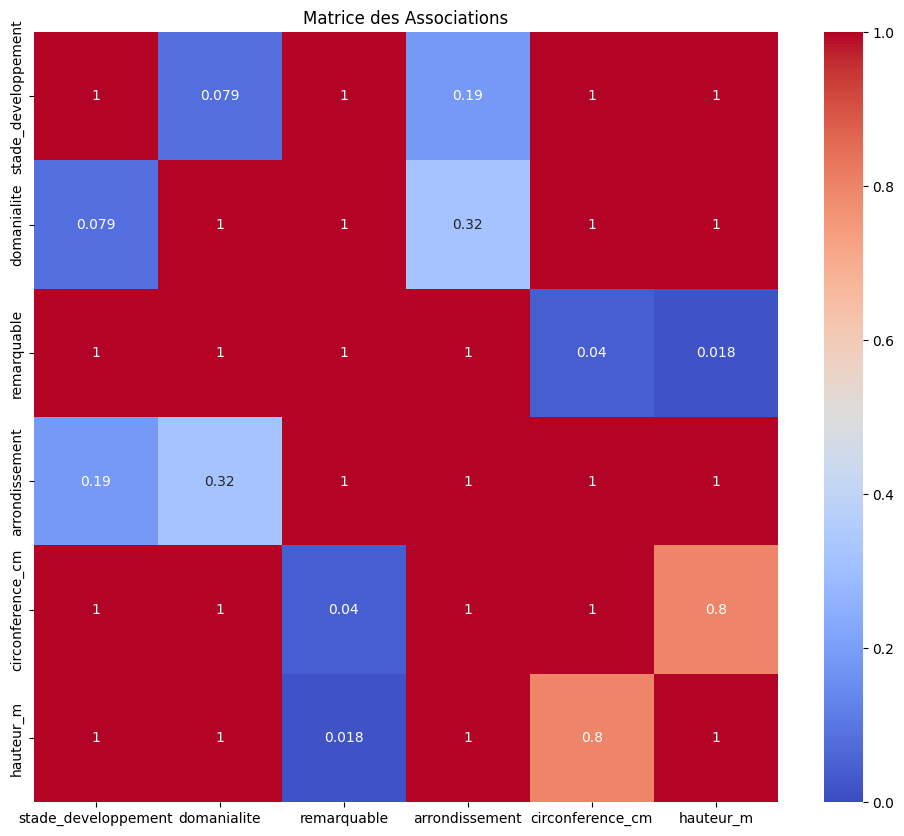

In [59]:
# Fonction pour calculer le coefficient de Cramér's V
def cramers_v(confusion_matrix):
    try:
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        r, k = confusion_matrix.shape
        if min(r, k) == 1:
            return np.nan
        return np.sqrt(chi2 / (n * (min(r, k) - 1)))
    except ValueError:
        return np.nan

# Fonction pour effectuer l'ANOVA entre une variable quantitative et une variable qualitative
def anova_quant_qual(quant_var, qual_var):
    groups = [quant_var[qual_var == group] for group in qual_var.unique() if sum(qual_var == group) > 1]  # Filtrer les petits groupes
    if len(groups) > 1:
        return f_oneway(*groups)
    else:
        return np.nan  # Retourner NaN si les groupes ne sont pas suffisants


# Identification des variables quantitatives et qualitatives
variables = ['stade_developpement', 'domanialite', 'remarquable', 'arrondissement', 'circonference_cm', 'hauteur_m']
quantitative_vars = data.select_dtypes(include=[np.number]).columns
qualitative_vars = data.select_dtypes(include=[object]).columns

# Initialisation de la matrice des associations
associations = pd.DataFrame(index=variables, columns=variables)

# Calcul des associations entre les variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            if var1 in quantitative_vars and var2 in quantitative_vars:
                # Corrélation de Pearson pour les variables quantitatives
                corr = data[[var1, var2]].corr().iloc[0, 1]
                associations.loc[var1, var2] = corr
            elif var1 in qualitative_vars and var2 in qualitative_vars:
                # Coefficient de Cramér's V pour les variables qualitatives
                confusion_matrix = pd.crosstab(data[var1], data[var2])
                associations.loc[var1, var2] = cramers_v(confusion_matrix)
            elif (var1 in quantitative_vars and var2 in qualitative_vars) or (var1 in qualitative_vars and var2 in quantitative_vars):
                # ANOVA pour les variables quantitatives vs qualitatives
                if var1 in quantitative_vars:
                    quant_var = data[var1]
                    qual_var = data[var2]
                else:
                    quant_var = data[var2]
                    qual_var = data[var1]
                anova_result = anova_quant_qual(quant_var, qual_var)
                associations.loc[var1, var2] = 1 - anova_result.pvalue
        else:
            associations.loc[var1, var2] = 1.0

print("Matrice des associations (Cramér's V et ANOVA) :")
print(associations.astype(float))

# Visualisation de la matrice des associations
plt.figure(figsize=(12, 10))
sns.heatmap(associations.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matrice des Associations")
plt.show()


# Cible d'Étude, Analyse Approfondie et Visualisation

## 1. Analyse par Arrondissement

## 2 Analyse par Stade de Développement et Arrondissement

# filtrer le dataset en prenant les cibles non nulles nan
preciser le pourcentage restant du dataset non null

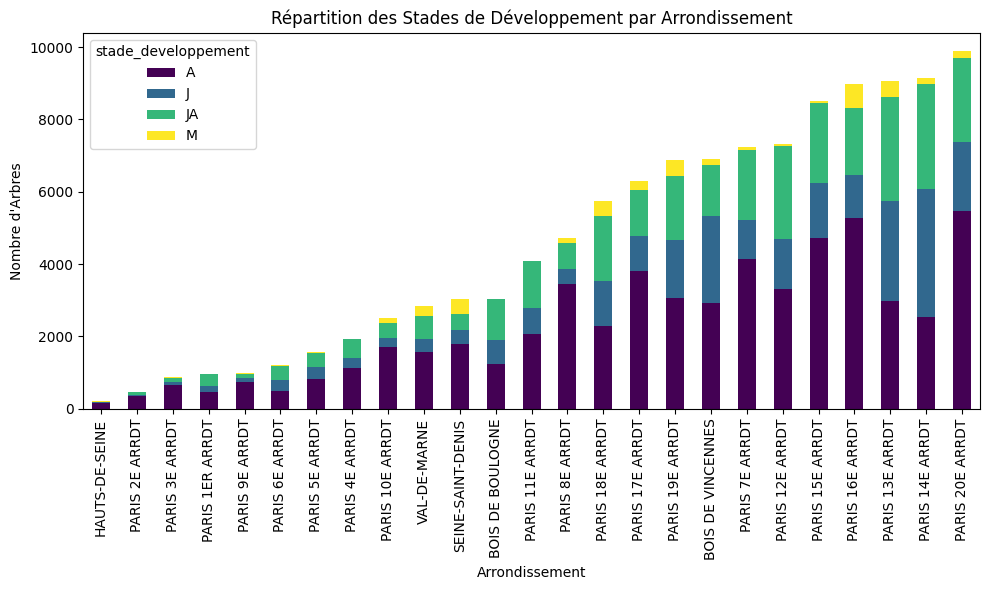

In [64]:
# Calculer le nombre total d'arbres par arrondissement
total_arbres_par_arrondissement = data['arrondissement'].value_counts().sort_values()

# Définir l'ordre des arrondissements basé sur le nombre total d'arbres
arrondissement_order = total_arbres_par_arrondissement.index

# Crosstab pour Stade de Développement par Arrondissement
stade_arrondissement = pd.crosstab(data['arrondissement'], data['stade_developpement'])

# Réorganiser les lignes du crosstab selon l'ordre défini
stade_arrondissement = stade_arrondissement.loc[arrondissement_order]

# Visualisation
stade_arrondissement.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition des Stades de Développement par Arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'Arbres")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

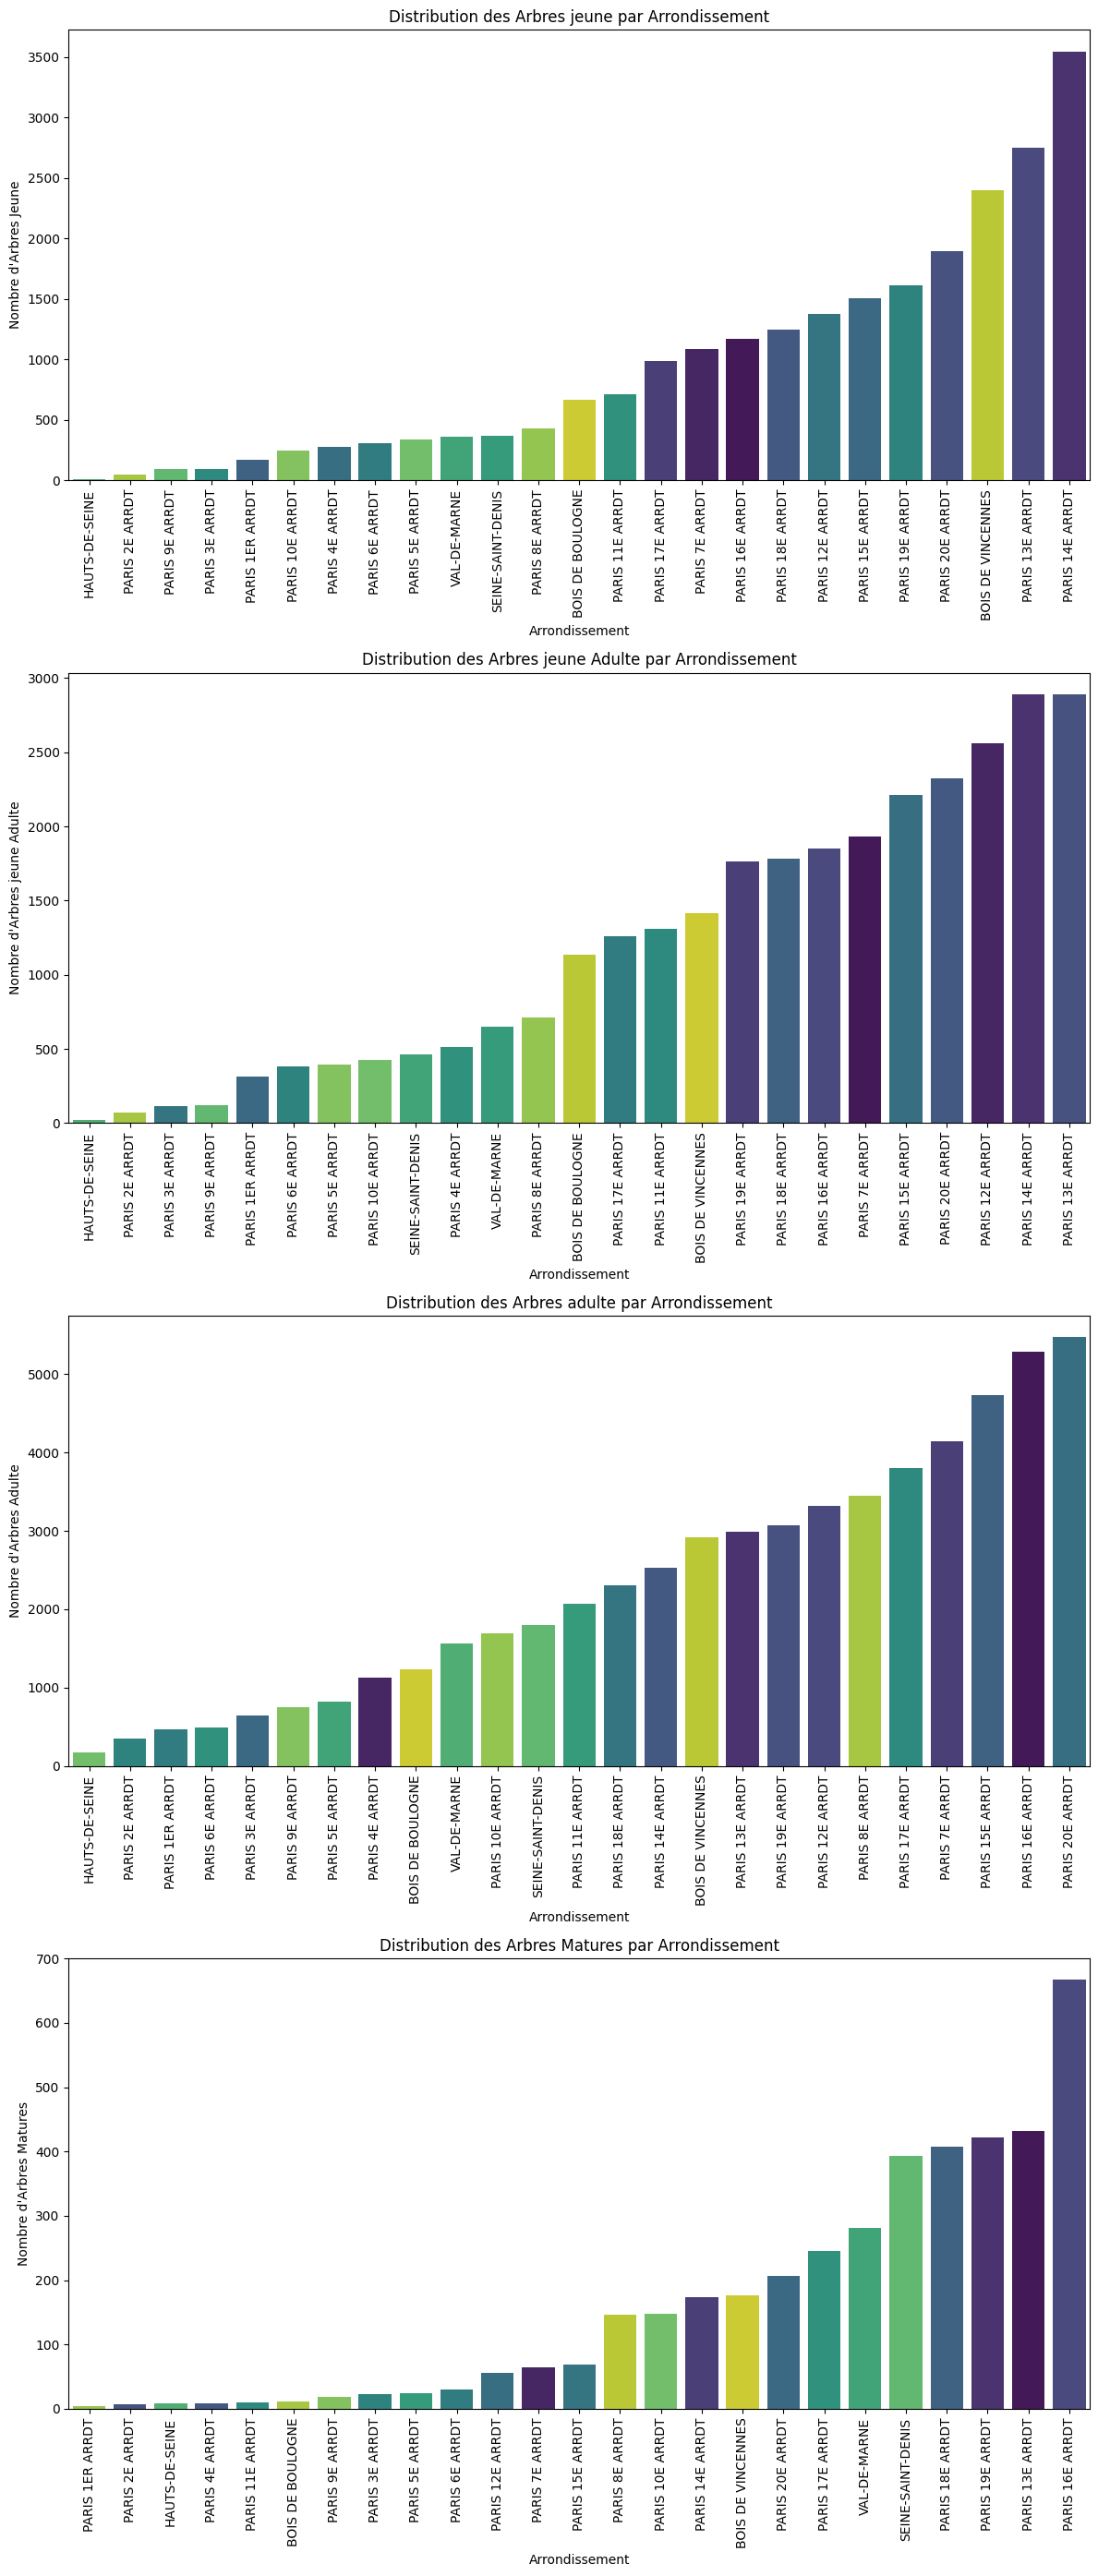

In [65]:
# Filtrer les données pour garder uniquement les arbres par stade de développement
data_jeune = data[data['stade_developpement'] == 'J']
data_jeune_adulte = data[data['stade_developpement'] == 'JA']
data_adulte = data[data['stade_developpement'] == 'A']
data_mature = data[data['stade_developpement'] == 'M']

# Calculer le nombre d'arbres par stade de développement par arrondissement
jeune_counts = data_jeune['arrondissement'].value_counts().sort_values()
jeune_adulte_counts = data_jeune_adulte['arrondissement'].value_counts().sort_values()
adulte_counts = data_adulte['arrondissement'].value_counts().sort_values()
mature_counts = data_mature['arrondissement'].value_counts().sort_values()

# Définir l'ordre des arrondissements basé sur le nombre d'arbres par stade de developpement
arrondissement_order_jeune = jeune_counts.index
arrondissement_order_jeune_adulte = jeune_adulte_counts.index
arrondissement_order_adulte = adulte_counts.index
arrondissement_order_mature = mature_counts.index

# Visualisation
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 28))


# Créer le graphique
sns.countplot(data=data_jeune, x='arrondissement',hue='arrondissement', order=arrondissement_order_jeune, palette='viridis',ax=axes[0])
axes[0].set_title("Distribution des Arbres jeune par Arrondissement")
axes[0].set_xlabel("Arrondissement")
axes[0].set_ylabel("Nombre d'Arbres Jeune")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data=data_jeune_adulte, x='arrondissement',hue='arrondissement', order=arrondissement_order_jeune_adulte, palette='viridis',ax=axes[1])
axes[1].set_title("Distribution des Arbres jeune Adulte par Arrondissement")
axes[1].set_xlabel("Arrondissement")
axes[1].set_ylabel("Nombre d'Arbres jeune Adulte")
axes[1].tick_params(axis='x', rotation=90)

sns.countplot(data=data_adulte, x='arrondissement',hue='arrondissement', order=arrondissement_order_adulte, palette='viridis',ax=axes[2])
axes[2].set_title("Distribution des Arbres adulte par Arrondissement")
axes[2].set_xlabel("Arrondissement")
axes[2].set_ylabel("Nombre d'Arbres Adulte")
axes[2].tick_params(axis='x', rotation=90)

sns.countplot(data=data_mature, x='arrondissement',hue='arrondissement', order=arrondissement_order_mature, palette='viridis',ax=axes[3])
axes[3].set_title("Distribution des Arbres Matures par Arrondissement")
axes[3].set_xlabel("Arrondissement")
axes[3].set_ylabel("Nombre d'Arbres Matures")
axes[3].tick_params(axis='x', rotation=90)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

Faire l'anayse

In [67]:
data_dom = data['domanialite'].isna().sum()
data_dom

np.int64(0)

## Visualization

reprendre univarié et la compléter
- analyse à la cible
- bien expliquer ce que j'observe
- toujours penser utilisateur